In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats

In [97]:
runs =[
    "run-no-ambig", "run-with-ambig-orig", "run-general-ambig",
    "run-no-ambig-0.05-expand", "run-with-ambig-0.05-expand-orig", "run-general-ambig-0.05-expand",
    "run-no-ambig-0.2-expand", "run-with-ambig-0.2-expand", "run-general-ambig-0.2-expand","run-water-refine",
    "run-with-ambig", "run-with-ambig-0.05-expand",
    "run-cg-with-lig", "run-cg-water"
]   
succes_list = ['3J95', '3J96', '5GRS', '5HNY', '5WCB', '6ACG', '6AHF', '6IRF', '6N1Q', '6N7G', '6N8Z', '6R7I', '6UBY', '6UC0']
# succes_list = ['3J95', '5GRS', '5WCB', '6ACG']

tick_label_dict ={
    "run-no-ambig" : "1",
    "run-with-ambig-orig" : "2",
    "run-general-ambig" : "3",
    "run-no-ambig-0.05-expand" : "4",
    "run-with-ambig-0.05-expand-orig" : "5",
    "run-general-ambig-0.05-expand" : "6",
    "run-no-ambig-0.2-expand" : "7",
    "run-with-ambig-0.2-expand" : "8",
    "run-general-ambig-0.2-expand" : "9",
    "run-cg" : "coarse grained",
    "run-cg2" : "coarse grained 2",
    "run-cg-with-lig" : "13",
    "run-water-refine" : "10",
    'run-no-ambig-0.05-expand-EM' : "it1 no restraints 0.05 expand EM",
    'run-with-ambig-0.05-expand-EM' : "it1 with restraints 0.05 expand EM",
    'run-general-ambig-0.05-expand-EM' : "it1 general restraints 0.05 expand EM",
    "run-cg-water" : "14",
    "run-general-ambig-EM" : "it1 gr + EM",
    "run-with-ambig" : "11",
    "run-with-ambig-0.05-expand" : "12"
}

def make_tick_labels(runs):
    tick_labels = []
    for run in runs:
        tick_labels.append(tick_label_dict[run])
    return tick_labels

In [76]:
def get_ref_secondary():
    """returns a DataFrame containing all the reference structure values"""
    ref_df = pd.read_csv("analysis/refrence-stride.csv", index_col = 0)
  
    return ref_df

def make_secondary_df(run):
    run = "analysis_{}".format(run)
    
    df_3J95 = pd.read_csv(("analysis/{}/3J95_stride.csv").format(run), index_col = "structure")
    df_3J96 = pd.read_csv(("analysis/{}/3J96_stride.csv").format(run), index_col = "structure")
    df_5GRS = pd.read_csv(("analysis/{}/5GRS_stride.csv").format(run), index_col = "structure")
    df_5HNY = pd.read_csv(("analysis/{}/5HNY_stride.csv").format(run), index_col = "structure")
    df_5WCB = pd.read_csv(("analysis/{}/5WCB_stride.csv").format(run), index_col = "structure")
    df_6ACG = pd.read_csv(("analysis/{}/6ACG_stride.csv").format(run), index_col = "structure")
    df_6AHF = pd.read_csv(("analysis/{}/6AHF_stride.csv").format(run), index_col = "structure")
    df_6IRF = pd.read_csv(("analysis/{}/6IRF_stride.csv").format(run), index_col = "structure")
    df_6N1Q = pd.read_csv(("analysis/{}/6N1Q_stride.csv").format(run), index_col = "structure")
    df_6N7G = pd.read_csv(("analysis/{}/6N7G_stride.csv").format(run), index_col = "structure")
    df_6N8Z = pd.read_csv(("analysis/{}/6N8Z_stride.csv").format(run), index_col = "structure")
    df_6R7I = pd.read_csv(("analysis/{}/6R7I_stride.csv").format(run), index_col = "structure")
    df_6UBY = pd.read_csv(("analysis/{}/6UBY_stride.csv").format(run), index_col = "structure")
    df_6UC0 = pd.read_csv(("analysis/{}/6UC0_stride.csv").format(run), index_col = "structure")
    
    df_list = [
        df_3J95,
        df_3J96,
        df_5GRS,
        df_5HNY,
        df_5WCB,
        df_6ACG,
        df_6AHF,
        df_6IRF,
        df_6N1Q,
        df_6N7G,
        df_6N8Z,
        df_6R7I,
        df_6UBY,
        df_6UC0,
    ]
    
    return df_list

In [93]:
def make_stride_df(run, wrong_names=False):
    column_names = {"Helix" : "Sheet", "Sheet" : "Helix"}
    ref_df = get_ref_secondary()
    stride_df = make_secondary_df(run)
    ref = ref_df.div(ref_df["All"], axis = 0).mul(100).rename(columns=column_names)
    total_df = pd.DataFrame()
    for df in stride_df:
        if wrong_names:
            df = df.rename(columns=column_names)
        
        struct = "{}.pdb".format(df.index[1][0:4])
        if struct[:4] in succes_list:
            df = df.iloc[:,1:6]
            df = df.div(df['All'], axis = 0).mul(100)
        
            new_df = pd.DataFrame()
            for index, value in ref.loc[struct].iteritems():
                add_df = df.loc[:,index].sub(value)
                new_df = pd.concat([new_df,add_df], axis=1)

            new_df.pop("All")
            total_df = pd.concat([total_df, new_df], ignore_index=True)
    return total_df

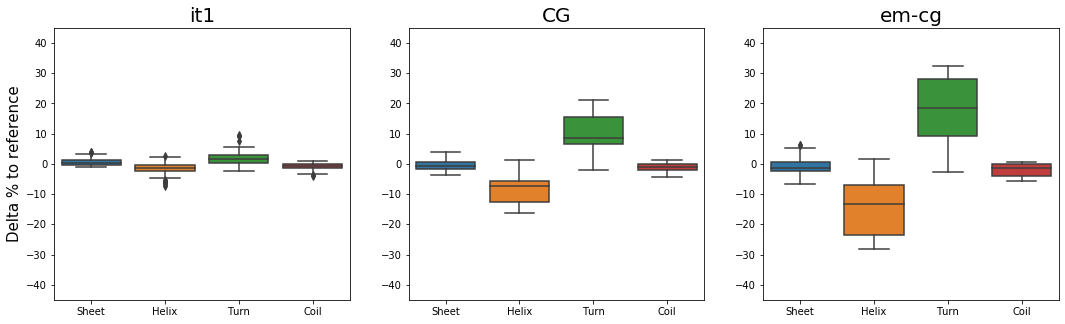

In [98]:
fig, ax = plt.subplots(ncols = 3, figsize = (18, 5))
df_cg = make_stride_df(runs[12], True)
df_sa = make_stride_df(runs[0], True)
df_run2 = make_stride_df("em-cg/run2")
plot_cg = sns.boxplot(data = df_cg, ax = ax[1])
plot_sa = sns.boxplot(data = df_sa, ax = ax[0])
plot_run2 = sns.boxplot(data = df_run2, ax = ax[2])
plt.setp(plot_cg ,ylim=[-45,45])
plt.setp(plot_sa ,ylim=[-45,45])
plt.setp(plot_run2 ,ylim=[-45,45])
plot_cg.set_title("CG", fontsize = 20)
plot_sa.set_title("it1", fontsize = 20)
plot_run2.set_title("em-cg", fontsize = 20)
plot_sa.set_ylabel("Delta % to reference", fontsize = 15)
plt.savefig("stride", dpi = 200)
plt.show()

In [94]:
df_run2 = make_stride_df("em-cg/run2")
print(df_run2)

      Sheet     Helix       Turn      Coil
0 -2.434733 -22.29612  26.354056 -1.623203
1 -2.434733 -22.29612  26.354056 -1.623203
2 -2.434733 -22.29612  26.354056 -1.623203
3 -2.434733 -22.29612  26.354056 -1.623203
